In [4]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE

names = np.load("path_to_names")
X = np.load("path_to_TM_matrix")

n_clusters_estimated = 5
spectral_clustering = SpectralClustering(
    n_clusters=n_clusters_estimated, affinity="precomputed"
)

cluster_labels = spectral_clustering.fit_predict(X)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

In [5]:

for index, i in enumerate(names):
    if i[0] == "m" or i[0] == "v":
        continue

ind_m3 = 0
ind_72 = 0
ind_m1 = 0

for index, i in enumerate(f4):
    if i == "mango3":
        ind_m3 = index
    if i == "mango1":
        ind_m1 = index
    if i == "mango_6up0_72_mv4":
        ind_72 = index

fname_m = []
find_mi = []

fname_n = []
find_ni = []

for index, i in enumerate(f4):
    if (i[0] == "m" or i[0] == "v") and i[1] != "a":
        if i[0] == "m":
            fname_m.append(i)
            find_mi.append(index)
        if i[0] == "v":
            fname_n.append(i)
            find_ni.append(index)


/tmp/ipykernel_254885/1084470082.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


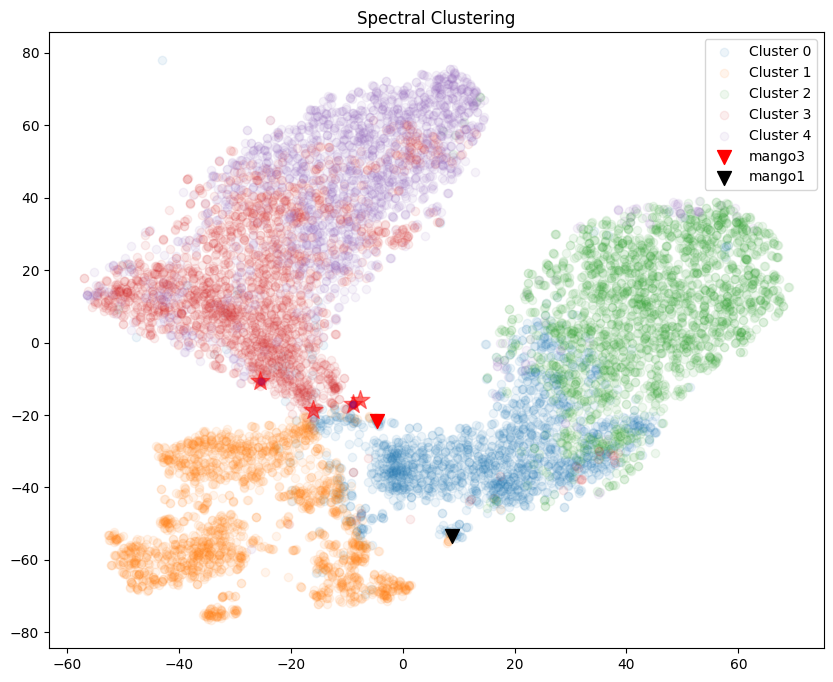

In [6]:
plt.figure(figsize=(10, 8))
plt.title("Spectral Clustering")
for cluster_label in range(n_clusters_estimated):
    # index += 1
    mask = cluster_labels == cluster_label
    plt.scatter(
        X_tsne[mask, 0],
        X_tsne[mask, 1],
        label=f"Cluster {cluster_label}",
        cmap="rainbow",
        alpha=0.08,
    )
plt.scatter(
    X_tsne[ind_m3, 0],
    X_tsne[ind_m3, 1],
    color="red",
    marker="v",
    alpha=1,
    label=f"mango3",
    s=100,
)
plt.scatter(
    X_tsne[ind_m1, 0],
    X_tsne[ind_m1, 1],
    color="black",
    marker="v",
    alpha=1,
    label=f"mango1",
    s=100,
)
plt.scatter(
    X_tsne[ind_72, 0],
    X_tsne[ind_72, 1],
    color="red",
    marker="*",
    alpha=0.5,
    s=200,
)

flag = 0


for i, n in zip(find_mi, fname_m):
    c = "purple"
    s = 20
    if n in ["m15","m12"]:
        c = "red"
        s = 200
        flag = 1
    if flag:
        plt.scatter(
            X_tsne[i, 0], X_tsne[i, 1], color=c, marker="*", alpha=0.5, s=s
        )
    else:
        plt.scatter(
            X_tsne[i, 0], X_tsne[i, 1], color=c, alpha=0.08, s=s
        )
    flag = 0

for i, n in zip(find_ni, fname_n):
    c = "purple"
    s = 20
    if n in ["v1"]:
        c = "red"
        s = 200
        flag = 1
    if flag:
        plt.scatter(
            X_tsne[i, 0], X_tsne[i, 1], color=c, marker="*", alpha=0.5, s=s
        )
    else:
        plt.scatter(
            X_tsne[i, 0], X_tsne[i, 1], color=c, alpha=0.08, s=s
        )
    flag = 0

plt.legend(loc="upper right")
# plt.savefig("cluster_out_2.png", format='png', dpi=1200)